In [154]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__ #checking version of tensorflow 

'1.11.0'

#Import the Fashion MNIST dataset

In [156]:
# Import fashion_mnist data set from TensorFlow
fashion_mnist = keras.datasets.fashion_mnist 

# Dividing the data set to train and test sets 
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

In [157]:
# Create a list of items and store it under class_names
class_names = \
    ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
     'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Explore the data

In [158]:
# Checking the shape of the train_images set 
# with 60,000 images with each image represented as 28x28 pixels 
train_images.shape 

(60000, 28, 28)

In [159]:
# Find the length of the train_labels set ---> 60,000 labels 
len(train_labels)

60000

In [160]:
train_labels #each label is an integer ranging from 0-9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [161]:
test_images.shape

(10000, 28, 28)

In [162]:
len(test_labels)

10000

#Preprocess the data

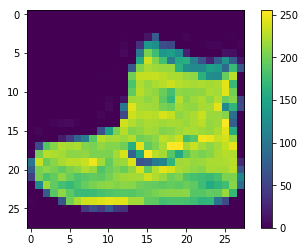

In [163]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() #Show pixel values fall in the range of 0 to 255
plt.grid(False)

In [164]:
#Make sure to both data (train & test) are preprocessed the same way
train_images = train_images/255.0
test_images = test_images/255.0

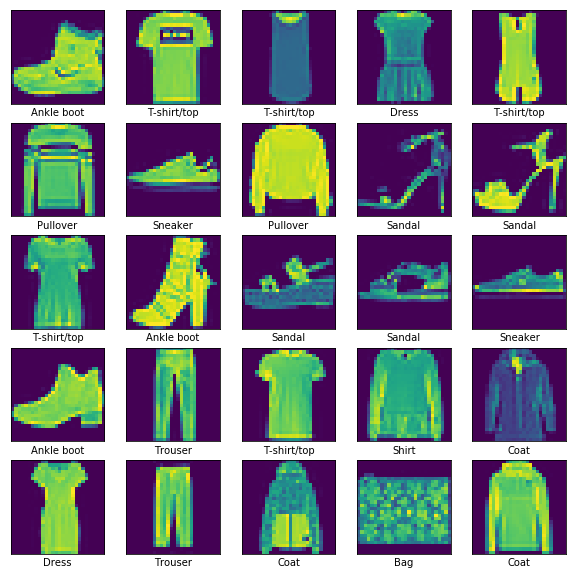

In [165]:
# Display the first 25 images from the training set and display the class name below each image. 
# Verify that the data is in the correct format and we're ready to build and train the network.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # cmap = plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])

#Build the model

In [166]:
#Seting up the layers - the basic building block of neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#First layer: transforms the format of the images from a 2d-array (of 28 by 28 pixels), 
            # to a 1d-array of 28 * 28 = 784 pixels

#Second & Third layer: these are densely-connected, or fully-connected, neural layers. 
            # The first Dense layer has 128 nodes (or neurons). 
            # The second (and last) layer is a 10-node softmax layer
                # —this returns an array of 10 probability scores that sum to 1. 
# Each node contains a score that indicates the probability 
# that the current image belongs to one of the 10 classes.

#Compile the model

In [167]:
#Compile the model 
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#Loss function — measures how accurate the model is during training. 
    # We want to minimize this function to "steer" the model in the right direction.

#Optimizer — How the model is updated based on the data it sees and its loss function.

#Metrics —Used to monitor the training and testing steps. 

# These example uses accuracy, the fraction of the images that are correctly classified.

#Train the model

In [170]:
model.fit(train_images, train_labels, epochs=5) 
# epochs = iteration => how many times the algorithm is going to change

Epoch 1/5
   32/60000 [..............................] - ETA: 1:09 - loss: 0.3125 - acc: 0.8438

  128/60000 [..............................] - ETA: 43s - loss: 0.3147 - acc: 0.8906 

  352/60000 [..............................] - ETA: 24s - loss: 0.3746 - acc: 0.8722

  672/60000 [..............................] - ETA: 17s - loss: 0.3407 - acc: 0.8690

 1120/60000 [..............................] - ETA: 13s - loss: 0.3226 - acc: 0.8786

 1536/60000 [..............................] - ETA: 11s - loss: 0.3235 - acc: 0.8815

 1824/60000 [..............................] - ETA: 11s - loss: 0.3182 - acc: 0.8843

 2144/60000 [>.............................] - ETA: 11s - loss: 0.3151 - acc: 0.8881

 2400/60000 [>.............................] - ETA: 11s - loss: 0.3149 - acc: 0.8875

 2656/60000 [>.............................] - ETA: 11s - loss: 0.3174 - acc: 0.8867

 2976/60000 [>.............................] - ETA: 10s - loss: 0.3272 - acc: 0.8827

 3168/60000 [>.............................] - ETA: 11s - loss: 0.3213 - acc: 0.8857

 3328/60000 [>.............................] - ETA: 11s - loss: 0.3169 - acc: 0.8873

 3520/60000 [>.............................] - ETA: 11s - loss: 0.3150 - acc: 0.8866

 3744/60000 [>.............................] - ETA: 11s - loss: 0.3163 - acc: 0.8854

 3968/60000 [>.............................] - ETA: 11s - loss: 0.3181 - acc: 0.8848

 4224/60000 [=>............................] - ETA: 11s - loss: 0.3172 - acc: 0.8842

 4608/60000 [=>............................] - ETA: 11s - loss: 0.3155 - acc: 0.8850

 4864/60000 [=>............................] - ETA: 11s - loss: 0.3148 - acc: 0.8853

 5088/60000 [=>............................] - ETA: 11s - loss: 0.3118 - acc: 0.8870

 5504/60000 [=>............................] - ETA: 10s - loss: 0.3088 - acc: 0.8866

 5920/60000 [=>............................] - ETA: 10s - loss: 0.3084 - acc: 0.8861

 6240/60000 [==>...........................] - ETA: 10s - loss: 0.3062 - acc: 0.8872

 6656/60000 [==>...........................] - ETA: 10s - loss: 0.3096 - acc: 0.8857

 6976/60000 [==>...........................] - ETA: 10s - loss: 0.3061 - acc: 0.8875

 7424/60000 [==>...........................] - ETA: 9s - loss: 0.3059 - acc: 0.8877 

 7840/60000 [==>...........................] - ETA: 9s - loss: 0.3072 - acc: 0.8876

 8256/60000 [===>..........................] - ETA: 9s - loss: 0.3052 - acc: 0.8883

 8576/60000 [===>..........................] - ETA: 9s - loss: 0.3074 - acc: 0.8878

 8992/60000 [===>..........................] - ETA: 8s - loss: 0.3062 - acc: 0.8885

 9536/60000 [===>..........................] - ETA: 8s - loss: 0.3055 - acc: 0.8893

10016/60000 [====>.........................] - ETA: 8s - loss: 0.3070 - acc: 0.8897

10336/60000 [====>.........................] - ETA: 8s - loss: 0.3066 - acc: 0.8895

10720/60000 [====>.........................] - ETA: 8s - loss: 0.3088 - acc: 0.8890

11008/60000 [====>.........................] - ETA: 8s - loss: 0.3068 - acc: 0.8896

11424/60000 [====>.........................] - ETA: 8s - loss: 0.3060 - acc: 0.8898

11872/60000 [====>.........................] - ETA: 7s - loss: 0.3059 - acc: 0.8896

12352/60000 [=====>........................] - ETA: 7s - loss: 0.3066 - acc: 0.8895

12832/60000 [=====>........................] - ETA: 7s - loss: 0.3069 - acc: 0.8894

13312/60000 [=====>........................] - ETA: 7s - loss: 0.3073 - acc: 0.8893

13792/60000 [=====>........................] - ETA: 7s - loss: 0.3071 - acc: 0.8896

14272/60000 [======>.......................] - ETA: 7s - loss: 0.3078 - acc: 0.8890

14752/60000 [======>.......................] - ETA: 6s - loss: 0.3069 - acc: 0.8898

15200/60000 [======>.......................] - ETA: 6s - loss: 0.3080 - acc: 0.8898

15584/60000 [======>.......................] - ETA: 6s - loss: 0.3095 - acc: 0.8889

15968/60000 [======>.......................] - ETA: 6s - loss: 0.3093 - acc: 0.8888

16416/60000 [=======>......................] - ETA: 6s - loss: 0.3103 - acc: 0.8885

16864/60000 [=======>......................] - ETA: 6s - loss: 0.3099 - acc: 0.8883

17344/60000 [=======>......................] - ETA: 6s - loss: 0.3114 - acc: 0.8877

17856/60000 [=======>......................] - ETA: 6s - loss: 0.3124 - acc: 0.8873

18304/60000 [========>.....................] - ETA: 6s - loss: 0.3129 - acc: 0.8869

18752/60000 [========>.....................] - ETA: 5s - loss: 0.3112 - acc: 0.8875

19264/60000 [========>.....................] - ETA: 5s - loss: 0.3112 - acc: 0.8869

19712/60000 [========>.....................] - ETA: 5s - loss: 0.3126 - acc: 0.8870

20096/60000 [=========>....................] - ETA: 5s - loss: 0.3123 - acc: 0.8872

20576/60000 [=========>....................] - ETA: 5s - loss: 0.3110 - acc: 0.8877

21024/60000 [=========>....................] - ETA: 5s - loss: 0.3091 - acc: 0.8882

21504/60000 [=========>....................] - ETA: 5s - loss: 0.3087 - acc: 0.8882

21984/60000 [=========>....................] - ETA: 5s - loss: 0.3086 - acc: 0.8883

22432/60000 [==========>...................] - ETA: 5s - loss: 0.3089 - acc: 0.8886

22880/60000 [==========>...................] - ETA: 5s - loss: 0.3098 - acc: 0.8883

23264/60000 [==========>...................] - ETA: 5s - loss: 0.3114 - acc: 0.8882

23712/60000 [==========>...................] - ETA: 5s - loss: 0.3103 - acc: 0.8885

24128/60000 [===========>..................] - ETA: 4s - loss: 0.3109 - acc: 0.8881

24544/60000 [===========>..................] - ETA: 4s - loss: 0.3115 - acc: 0.8881

24960/60000 [===========>..................] - ETA: 4s - loss: 0.3107 - acc: 0.8885

25408/60000 [===========>..................] - ETA: 4s - loss: 0.3108 - acc: 0.8882

25856/60000 [===========>..................] - ETA: 4s - loss: 0.3108 - acc: 0.8882

26304/60000 [============>.................] - ETA: 4s - loss: 0.3102 - acc: 0.8882

26752/60000 [============>.................] - ETA: 4s - loss: 0.3101 - acc: 0.8882

27200/60000 [============>.................] - ETA: 4s - loss: 0.3100 - acc: 0.8882

27616/60000 [============>.................] - ETA: 4s - loss: 0.3095 - acc: 0.8885

28032/60000 [=============>................] - ETA: 4s - loss: 0.3092 - acc: 0.8885

28480/60000 [=============>................] - ETA: 4s - loss: 0.3097 - acc: 0.8883

28832/60000 [=============>................] - ETA: 4s - loss: 0.3095 - acc: 0.8882

29248/60000 [=============>................] - ETA: 4s - loss: 0.3101 - acc: 0.8881

29696/60000 [=============>................] - ETA: 4s - loss: 0.3098 - acc: 0.8880

30144/60000 [==============>...............] - ETA: 4s - loss: 0.3104 - acc: 0.8876

30624/60000 [==============>...............] - ETA: 3s - loss: 0.3104 - acc: 0.8877

31072/60000 [==============>...............] - ETA: 3s - loss: 0.3101 - acc: 0.8878

31488/60000 [==============>...............] - ETA: 3s - loss: 0.3099 - acc: 0.8880

31936/60000 [==============>...............] - ETA: 3s - loss: 0.3099 - acc: 0.8881

32416/60000 [===============>..............] - ETA: 3s - loss: 0.3095 - acc: 0.8883

32896/60000 [===============>..............] - ETA: 3s - loss: 0.3089 - acc: 0.8885

33312/60000 [===============>..............] - ETA: 3s - loss: 0.3090 - acc: 0.8885

33696/60000 [===============>..............] - ETA: 3s - loss: 0.3085 - acc: 0.8886

34144/60000 [================>.............] - ETA: 3s - loss: 0.3081 - acc: 0.8886

34624/60000 [================>.............] - ETA: 3s - loss: 0.3076 - acc: 0.8887

35104/60000 [================>.............] - ETA: 3s - loss: 0.3085 - acc: 0.8884

35584/60000 [================>.............] - ETA: 3s - loss: 0.3086 - acc: 0.8884

36032/60000 [=================>............] - ETA: 3s - loss: 0.3084 - acc: 0.8883

36480/60000 [=================>............] - ETA: 3s - loss: 0.3088 - acc: 0.8883

36928/60000 [=================>............] - ETA: 3s - loss: 0.3090 - acc: 0.8883

37408/60000 [=================>............] - ETA: 2s - loss: 0.3095 - acc: 0.8883

37824/60000 [=================>............] - ETA: 2s - loss: 0.3099 - acc: 0.8882

38240/60000 [==================>...........] - ETA: 2s - loss: 0.3097 - acc: 0.8882

38688/60000 [==================>...........] - ETA: 2s - loss: 0.3100 - acc: 0.8881

39136/60000 [==================>...........] - ETA: 2s - loss: 0.3103 - acc: 0.8879

39584/60000 [==================>...........] - ETA: 2s - loss: 0.3105 - acc: 0.8878

40000/60000 [===================>..........] - ETA: 2s - loss: 0.3109 - acc: 0.8878

40352/60000 [===================>..........] - ETA: 2s - loss: 0.3107 - acc: 0.8877

40672/60000 [===================>..........] - ETA: 2s - loss: 0.3104 - acc: 0.8877

40992/60000 [===================>..........] - ETA: 2s - loss: 0.3101 - acc: 0.8879

41312/60000 [===================>..........] - ETA: 2s - loss: 0.3100 - acc: 0.8880

41664/60000 [===================>..........] - ETA: 2s - loss: 0.3101 - acc: 0.8878

41984/60000 [===================>..........] - ETA: 2s - loss: 0.3102 - acc: 0.8879

42336/60000 [====================>.........] - ETA: 2s - loss: 0.3101 - acc: 0.8878

42720/60000 [====================>.........] - ETA: 2s - loss: 0.3105 - acc: 0.8876

43040/60000 [====================>.........] - ETA: 2s - loss: 0.3104 - acc: 0.8876

43328/60000 [====================>.........] - ETA: 2s - loss: 0.3110 - acc: 0.8874

43712/60000 [====================>.........] - ETA: 2s - loss: 0.3118 - acc: 0.8874

44064/60000 [=====================>........] - ETA: 2s - loss: 0.3121 - acc: 0.8873

44512/60000 [=====================>........] - ETA: 2s - loss: 0.3126 - acc: 0.8872

44960/60000 [=====================>........] - ETA: 1s - loss: 0.3121 - acc: 0.8875

45440/60000 [=====================>........] - ETA: 1s - loss: 0.3122 - acc: 0.8871

45888/60000 [=====================>........] - ETA: 1s - loss: 0.3122 - acc: 0.8872

46336/60000 [======================>.......] - ETA: 1s - loss: 0.3120 - acc: 0.8873

46784/60000 [======================>.......] - ETA: 1s - loss: 0.3123 - acc: 0.8870

47232/60000 [======================>.......] - ETA: 1s - loss: 0.3126 - acc: 0.8871

47648/60000 [======================>.......] - ETA: 1s - loss: 0.3125 - acc: 0.8870

48032/60000 [=======================>......] - ETA: 1s - loss: 0.3128 - acc: 0.8871

48448/60000 [=======================>......] - ETA: 1s - loss: 0.3125 - acc: 0.8870

48896/60000 [=======================>......] - ETA: 1s - loss: 0.3126 - acc: 0.8869

49344/60000 [=======================>......] - ETA: 1s - loss: 0.3125 - acc: 0.8869

49856/60000 [=======================>......] - ETA: 1s - loss: 0.3127 - acc: 0.8870

50336/60000 [========================>.....] - ETA: 1s - loss: 0.3120 - acc: 0.8871

50816/60000 [========================>.....] - ETA: 1s - loss: 0.3116 - acc: 0.8871

51296/60000 [========================>.....] - ETA: 1s - loss: 0.3119 - acc: 0.8870

51776/60000 [========================>.....] - ETA: 1s - loss: 0.3117 - acc: 0.8871

52160/60000 [=========================>....] - ETA: 1s - loss: 0.3114 - acc: 0.8870

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3115 - acc: 0.8868

52800/60000 [=========================>....] - ETA: 0s - loss: 0.3117 - acc: 0.8867

53152/60000 [=========================>....] - ETA: 0s - loss: 0.3113 - acc: 0.8869

53568/60000 [=========================>....] - ETA: 0s - loss: 0.3112 - acc: 0.8869

53984/60000 [=========================>....] - ETA: 0s - loss: 0.3116 - acc: 0.8867

54400/60000 [==========================>...] - ETA: 0s - loss: 0.3114 - acc: 0.8867

54880/60000 [==========================>...] - ETA: 0s - loss: 0.3117 - acc: 0.8866

55328/60000 [==========================>...] - ETA: 0s - loss: 0.3119 - acc: 0.8864

55744/60000 [==========================>...] - ETA: 0s - loss: 0.3120 - acc: 0.8865

56192/60000 [===========================>..] - ETA: 0s - loss: 0.3120 - acc: 0.8864

56640/60000 [===========================>..] - ETA: 0s - loss: 0.3120 - acc: 0.8864

57024/60000 [===========================>..] - ETA: 0s - loss: 0.3117 - acc: 0.8865

57376/60000 [===========================>..] - ETA: 0s - loss: 0.3115 - acc: 0.8864

57792/60000 [===========================>..] - ETA: 0s - loss: 0.3120 - acc: 0.8863

58240/60000 [============================>.] - ETA: 0s - loss: 0.3118 - acc: 0.8863

58688/60000 [============================>.] - ETA: 0s - loss: 0.3121 - acc: 0.8862

59136/60000 [============================>.] - ETA: 0s - loss: 0.3117 - acc: 0.8863

59552/60000 [============================>.] - ETA: 0s - loss: 0.3117 - acc: 0.8864

59968/60000 [============================>.] - ETA: 0s - loss: 0.3115 - acc: 0.8865

60000/60000 [==============================] - 8s 130us/step - loss: 0.3116 - acc: 0.8865


Epoch 2/5
   32/60000 [..............................] - ETA: 22s - loss: 0.1546 - acc: 0.9375

  384/60000 [..............................] - ETA: 9s - loss: 0.2997 - acc: 0.9062 

  736/60000 [..............................] - ETA: 9s - loss: 0.2604 - acc: 0.9185

 1120/60000 [..............................] - ETA: 8s - loss: 0.2590 - acc: 0.9179

 1536/60000 [..............................] - ETA: 8s - loss: 0.2569 - acc: 0.9173

 1952/60000 [..............................] - ETA: 8s - loss: 0.2644 - acc: 0.9170

 2368/60000 [>.............................] - ETA: 7s - loss: 0.2693 - acc: 0.9109

 2816/60000 [>.............................] - ETA: 7s - loss: 0.2801 - acc: 0.9055

 3264/60000 [>.............................] - ETA: 7s - loss: 0.2819 - acc: 0.9044

 3712/60000 [>.............................] - ETA: 7s - loss: 0.2825 - acc: 0.9030

 4160/60000 [=>............................] - ETA: 7s - loss: 0.2858 - acc: 0.9012

 4608/60000 [=>............................] - ETA: 7s - loss: 0.2838 - acc: 0.9015

 5056/60000 [=>............................] - ETA: 6s - loss: 0.2864 - acc: 0.9013

 5472/60000 [=>............................] - ETA: 6s - loss: 0.2864 - acc: 0.9000

 5920/60000 [=>............................] - ETA: 6s - loss: 0.2859 - acc: 0.8990

 6304/60000 [==>...........................] - ETA: 6s - loss: 0.2864 - acc: 0.8978

 6720/60000 [==>...........................] - ETA: 6s - loss: 0.2850 - acc: 0.8973

 7136/60000 [==>...........................] - ETA: 6s - loss: 0.2903 - acc: 0.8957

 7552/60000 [==>...........................] - ETA: 6s - loss: 0.2898 - acc: 0.8953

 7968/60000 [==>...........................] - ETA: 6s - loss: 0.2895 - acc: 0.8952

 8416/60000 [===>..........................] - ETA: 6s - loss: 0.2895 - acc: 0.8954

 8832/60000 [===>..........................] - ETA: 6s - loss: 0.2900 - acc: 0.8956

 9216/60000 [===>..........................] - ETA: 6s - loss: 0.2887 - acc: 0.8956

 9600/60000 [===>..........................] - ETA: 6s - loss: 0.2915 - acc: 0.8940

 9984/60000 [===>..........................] - ETA: 6s - loss: 0.2919 - acc: 0.8936

10432/60000 [====>.........................] - ETA: 6s - loss: 0.2911 - acc: 0.8930

10880/60000 [====>.........................] - ETA: 6s - loss: 0.2925 - acc: 0.8926

11200/60000 [====>.........................] - ETA: 6s - loss: 0.2942 - acc: 0.8921

11552/60000 [====>.........................] - ETA: 6s - loss: 0.2944 - acc: 0.8924

12000/60000 [=====>........................] - ETA: 6s - loss: 0.2943 - acc: 0.8929

12448/60000 [=====>........................] - ETA: 5s - loss: 0.2953 - acc: 0.8928

12896/60000 [=====>........................] - ETA: 5s - loss: 0.2966 - acc: 0.8926

13376/60000 [=====>........................] - ETA: 5s - loss: 0.2954 - acc: 0.8928

13824/60000 [=====>........................] - ETA: 5s - loss: 0.2954 - acc: 0.8931

14272/60000 [======>.......................] - ETA: 5s - loss: 0.2941 - acc: 0.8937

14656/60000 [======>.......................] - ETA: 5s - loss: 0.2944 - acc: 0.8938

15104/60000 [======>.......................] - ETA: 5s - loss: 0.2942 - acc: 0.8941

15552/60000 [======>.......................] - ETA: 5s - loss: 0.2931 - acc: 0.8942

15904/60000 [======>.......................] - ETA: 5s - loss: 0.2931 - acc: 0.8941

16288/60000 [=======>......................] - ETA: 5s - loss: 0.2933 - acc: 0.8940

16704/60000 [=======>......................] - ETA: 5s - loss: 0.2931 - acc: 0.8941

17152/60000 [=======>......................] - ETA: 5s - loss: 0.2938 - acc: 0.8937

17600/60000 [=======>......................] - ETA: 5s - loss: 0.2948 - acc: 0.8938

18080/60000 [========>.....................] - ETA: 5s - loss: 0.2937 - acc: 0.8942

18528/60000 [========>.....................] - ETA: 5s - loss: 0.2947 - acc: 0.8941

18976/60000 [========>.....................] - ETA: 5s - loss: 0.2938 - acc: 0.8944

19424/60000 [========>.....................] - ETA: 5s - loss: 0.2948 - acc: 0.8942

19872/60000 [========>.....................] - ETA: 4s - loss: 0.2949 - acc: 0.8942

20320/60000 [=========>....................] - ETA: 4s - loss: 0.2944 - acc: 0.8939

20672/60000 [=========>....................] - ETA: 4s - loss: 0.2945 - acc: 0.8939

21056/60000 [=========>....................] - ETA: 4s - loss: 0.2948 - acc: 0.8938

21472/60000 [=========>....................] - ETA: 4s - loss: 0.2947 - acc: 0.8935

21920/60000 [=========>....................] - ETA: 4s - loss: 0.2942 - acc: 0.8935

22336/60000 [==========>...................] - ETA: 4s - loss: 0.2938 - acc: 0.8938

22784/60000 [==========>...................] - ETA: 4s - loss: 0.2940 - acc: 0.8938

23232/60000 [==========>...................] - ETA: 4s - loss: 0.2938 - acc: 0.8937

23680/60000 [==========>...................] - ETA: 4s - loss: 0.2934 - acc: 0.8938

24128/60000 [===========>..................] - ETA: 4s - loss: 0.2935 - acc: 0.8937

24576/60000 [===========>..................] - ETA: 4s - loss: 0.2927 - acc: 0.8938

25024/60000 [===========>..................] - ETA: 4s - loss: 0.2928 - acc: 0.8939

25376/60000 [===========>..................] - ETA: 4s - loss: 0.2931 - acc: 0.8938

25760/60000 [===========>..................] - ETA: 4s - loss: 0.2941 - acc: 0.8933

26176/60000 [============>.................] - ETA: 4s - loss: 0.2939 - acc: 0.8936

26592/60000 [============>.................] - ETA: 4s - loss: 0.2940 - acc: 0.8938

27008/60000 [============>.................] - ETA: 4s - loss: 0.2944 - acc: 0.8934

27456/60000 [============>.................] - ETA: 4s - loss: 0.2946 - acc: 0.8931

27872/60000 [============>.................] - ETA: 3s - loss: 0.2948 - acc: 0.8932

28288/60000 [=============>................] - ETA: 3s - loss: 0.2950 - acc: 0.8931

28704/60000 [=============>................] - ETA: 3s - loss: 0.2944 - acc: 0.8933

29184/60000 [=============>................] - ETA: 3s - loss: 0.2936 - acc: 0.8938

29632/60000 [=============>................] - ETA: 3s - loss: 0.2933 - acc: 0.8938

30016/60000 [==============>...............] - ETA: 3s - loss: 0.2927 - acc: 0.8939

30400/60000 [==============>...............] - ETA: 3s - loss: 0.2932 - acc: 0.8936

30784/60000 [==============>...............] - ETA: 3s - loss: 0.2940 - acc: 0.8935

31200/60000 [==============>...............] - ETA: 3s - loss: 0.2947 - acc: 0.8931

31616/60000 [==============>...............] - ETA: 3s - loss: 0.2940 - acc: 0.8934

32064/60000 [===============>..............] - ETA: 3s - loss: 0.2934 - acc: 0.8937

32544/60000 [===============>..............] - ETA: 3s - loss: 0.2936 - acc: 0.8935

32992/60000 [===============>..............] - ETA: 3s - loss: 0.2937 - acc: 0.8936

33440/60000 [===============>..............] - ETA: 3s - loss: 0.2934 - acc: 0.8936

33920/60000 [===============>..............] - ETA: 3s - loss: 0.2933 - acc: 0.8934

34400/60000 [================>.............] - ETA: 3s - loss: 0.2933 - acc: 0.8935

34752/60000 [================>.............] - ETA: 3s - loss: 0.2932 - acc: 0.8935

35104/60000 [================>.............] - ETA: 3s - loss: 0.2928 - acc: 0.8937

35488/60000 [================>.............] - ETA: 3s - loss: 0.2931 - acc: 0.8936

35904/60000 [================>.............] - ETA: 2s - loss: 0.2931 - acc: 0.8936

36320/60000 [=================>............] - ETA: 2s - loss: 0.2931 - acc: 0.8937

36768/60000 [=================>............] - ETA: 2s - loss: 0.2927 - acc: 0.8937

37216/60000 [=================>............] - ETA: 2s - loss: 0.2924 - acc: 0.8936

37600/60000 [=================>............] - ETA: 2s - loss: 0.2924 - acc: 0.8936

37984/60000 [=================>............] - ETA: 2s - loss: 0.2925 - acc: 0.8937

38368/60000 [==================>...........] - ETA: 2s - loss: 0.2937 - acc: 0.8932

38752/60000 [==================>...........] - ETA: 2s - loss: 0.2934 - acc: 0.8933

39200/60000 [==================>...........] - ETA: 2s - loss: 0.2940 - acc: 0.8930

39648/60000 [==================>...........] - ETA: 2s - loss: 0.2940 - acc: 0.8930

40000/60000 [===================>..........] - ETA: 2s - loss: 0.2942 - acc: 0.8928

40352/60000 [===================>..........] - ETA: 2s - loss: 0.2946 - acc: 0.8926

40768/60000 [===================>..........] - ETA: 2s - loss: 0.2951 - acc: 0.8922

41184/60000 [===================>..........] - ETA: 2s - loss: 0.2947 - acc: 0.8922

41600/60000 [===================>..........] - ETA: 2s - loss: 0.2947 - acc: 0.8921

42048/60000 [====================>.........] - ETA: 2s - loss: 0.2948 - acc: 0.8920

42496/60000 [====================>.........] - ETA: 2s - loss: 0.2941 - acc: 0.8922

42944/60000 [====================>.........] - ETA: 2s - loss: 0.2942 - acc: 0.8920

43392/60000 [====================>.........] - ETA: 2s - loss: 0.2945 - acc: 0.8920

43840/60000 [====================>.........] - ETA: 1s - loss: 0.2941 - acc: 0.8920

44320/60000 [=====================>........] - ETA: 1s - loss: 0.2936 - acc: 0.8923

44704/60000 [=====================>........] - ETA: 1s - loss: 0.2935 - acc: 0.8923

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2934 - acc: 0.8923

45408/60000 [=====================>........] - ETA: 1s - loss: 0.2934 - acc: 0.8923

45824/60000 [=====================>........] - ETA: 1s - loss: 0.2935 - acc: 0.8923

46240/60000 [======================>.......] - ETA: 1s - loss: 0.2933 - acc: 0.8924

46688/60000 [======================>.......] - ETA: 1s - loss: 0.2940 - acc: 0.8922

47168/60000 [======================>.......] - ETA: 1s - loss: 0.2945 - acc: 0.8922

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2947 - acc: 0.8922

48064/60000 [=======================>......] - ETA: 1s - loss: 0.2950 - acc: 0.8920

48512/60000 [=======================>......] - ETA: 1s - loss: 0.2950 - acc: 0.8920

48928/60000 [=======================>......] - ETA: 1s - loss: 0.2945 - acc: 0.8922

49312/60000 [=======================>......] - ETA: 1s - loss: 0.2946 - acc: 0.8922

49728/60000 [=======================>......] - ETA: 1s - loss: 0.2940 - acc: 0.8923

50176/60000 [========================>.....] - ETA: 1s - loss: 0.2937 - acc: 0.8924

50592/60000 [========================>.....] - ETA: 1s - loss: 0.2934 - acc: 0.8924

51040/60000 [========================>.....] - ETA: 1s - loss: 0.2932 - acc: 0.8926

51488/60000 [========================>.....] - ETA: 1s - loss: 0.2931 - acc: 0.8927

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2934 - acc: 0.8925

52416/60000 [=========================>....] - ETA: 0s - loss: 0.2935 - acc: 0.8926

52864/60000 [=========================>....] - ETA: 0s - loss: 0.2933 - acc: 0.8926

53312/60000 [=========================>....] - ETA: 0s - loss: 0.2933 - acc: 0.8926

53792/60000 [=========================>....] - ETA: 0s - loss: 0.2940 - acc: 0.8924

54144/60000 [==========================>...] - ETA: 0s - loss: 0.2942 - acc: 0.8923

54496/60000 [==========================>...] - ETA: 0s - loss: 0.2942 - acc: 0.8923

54880/60000 [==========================>...] - ETA: 0s - loss: 0.2944 - acc: 0.8923

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2943 - acc: 0.8923

55744/60000 [==========================>...] - ETA: 0s - loss: 0.2941 - acc: 0.8925

56224/60000 [===========================>..] - ETA: 0s - loss: 0.2943 - acc: 0.8924

56704/60000 [===========================>..] - ETA: 0s - loss: 0.2941 - acc: 0.8925

57152/60000 [===========================>..] - ETA: 0s - loss: 0.2941 - acc: 0.8925

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2943 - acc: 0.8924

58048/60000 [============================>.] - ETA: 0s - loss: 0.2940 - acc: 0.8924

58464/60000 [============================>.] - ETA: 0s - loss: 0.2944 - acc: 0.8924

58816/60000 [============================>.] - ETA: 0s - loss: 0.2941 - acc: 0.8924

59200/60000 [============================>.] - ETA: 0s - loss: 0.2943 - acc: 0.8925

59648/60000 [============================>.] - ETA: 0s - loss: 0.2942 - acc: 0.8925

60000/60000 [==============================] - 7s 122us/step - loss: 0.2946 - acc: 0.8924


Epoch 3/5
   32/60000 [..............................] - ETA: 19s - loss: 0.1503 - acc: 0.9062

  352/60000 [..............................] - ETA: 10s - loss: 0.2405 - acc: 0.9261

  704/60000 [..............................] - ETA: 9s - loss: 0.2597 - acc: 0.9105 

 1088/60000 [..............................] - ETA: 9s - loss: 0.2435 - acc: 0.9108

 1536/60000 [..............................] - ETA: 8s - loss: 0.2400 - acc: 0.9154

 1984/60000 [..............................] - ETA: 7s - loss: 0.2543 - acc: 0.9093

 2432/60000 [>.............................] - ETA: 7s - loss: 0.2513 - acc: 0.9095

 2848/60000 [>.............................] - ETA: 7s - loss: 0.2542 - acc: 0.9080

 3264/60000 [>.............................] - ETA: 7s - loss: 0.2590 - acc: 0.9059

 3616/60000 [>.............................] - ETA: 7s - loss: 0.2631 - acc: 0.9046

 4000/60000 [=>............................] - ETA: 7s - loss: 0.2706 - acc: 0.9022

 4448/60000 [=>............................] - ETA: 7s - loss: 0.2671 - acc: 0.9024

 4896/60000 [=>............................] - ETA: 7s - loss: 0.2704 - acc: 0.9018

 5344/60000 [=>............................] - ETA: 6s - loss: 0.2742 - acc: 0.9001

 5824/60000 [=>............................] - ETA: 6s - loss: 0.2741 - acc: 0.8996

 6272/60000 [==>...........................] - ETA: 6s - loss: 0.2719 - acc: 0.8991

 6720/60000 [==>...........................] - ETA: 6s - loss: 0.2698 - acc: 0.9007

 7168/60000 [==>...........................] - ETA: 6s - loss: 0.2664 - acc: 0.9016

 7616/60000 [==>...........................] - ETA: 6s - loss: 0.2680 - acc: 0.9015

 8032/60000 [===>..........................] - ETA: 6s - loss: 0.2676 - acc: 0.9016

 8384/60000 [===>..........................] - ETA: 6s - loss: 0.2651 - acc: 0.9023

 8768/60000 [===>..........................] - ETA: 6s - loss: 0.2657 - acc: 0.9018

 9216/60000 [===>..........................] - ETA: 6s - loss: 0.2645 - acc: 0.9022

 9664/60000 [===>..........................] - ETA: 6s - loss: 0.2664 - acc: 0.9020

10144/60000 [====>.........................] - ETA: 6s - loss: 0.2680 - acc: 0.9011

10656/60000 [====>.........................] - ETA: 6s - loss: 0.2687 - acc: 0.9010

11104/60000 [====>.........................] - ETA: 5s - loss: 0.2694 - acc: 0.9008

11584/60000 [====>.........................] - ETA: 5s - loss: 0.2695 - acc: 0.9011

12064/60000 [=====>........................] - ETA: 5s - loss: 0.2712 - acc: 0.9001

12448/60000 [=====>........................] - ETA: 5s - loss: 0.2704 - acc: 0.9008

12832/60000 [=====>........................] - ETA: 5s - loss: 0.2713 - acc: 0.9002

13216/60000 [=====>........................] - ETA: 5s - loss: 0.2726 - acc: 0.8999

13664/60000 [=====>........................] - ETA: 5s - loss: 0.2738 - acc: 0.8992

14144/60000 [======>.......................] - ETA: 5s - loss: 0.2736 - acc: 0.8991

14624/60000 [======>.......................] - ETA: 5s - loss: 0.2738 - acc: 0.8994

15104/60000 [======>.......................] - ETA: 5s - loss: 0.2724 - acc: 0.8996

15552/60000 [======>.......................] - ETA: 5s - loss: 0.2723 - acc: 0.8992

16000/60000 [=======>......................] - ETA: 5s - loss: 0.2728 - acc: 0.8986

16480/60000 [=======>......................] - ETA: 5s - loss: 0.2713 - acc: 0.8996

16928/60000 [=======>......................] - ETA: 5s - loss: 0.2729 - acc: 0.8989

17280/60000 [=======>......................] - ETA: 5s - loss: 0.2726 - acc: 0.8989

17664/60000 [=======>......................] - ETA: 5s - loss: 0.2721 - acc: 0.8989

18080/60000 [========>.....................] - ETA: 5s - loss: 0.2735 - acc: 0.8985

18560/60000 [========>.....................] - ETA: 5s - loss: 0.2730 - acc: 0.8987

19040/60000 [========>.....................] - ETA: 4s - loss: 0.2732 - acc: 0.8986

19520/60000 [========>.....................] - ETA: 4s - loss: 0.2725 - acc: 0.8988

20000/60000 [=========>....................] - ETA: 4s - loss: 0.2723 - acc: 0.8992

20480/60000 [=========>....................] - ETA: 4s - loss: 0.2724 - acc: 0.8992

20928/60000 [=========>....................] - ETA: 4s - loss: 0.2737 - acc: 0.8989

21408/60000 [=========>....................] - ETA: 4s - loss: 0.2748 - acc: 0.8981

21760/60000 [=========>....................] - ETA: 4s - loss: 0.2754 - acc: 0.8981

22112/60000 [==========>...................] - ETA: 4s - loss: 0.2747 - acc: 0.8982

22496/60000 [==========>...................] - ETA: 4s - loss: 0.2745 - acc: 0.8981

22944/60000 [==========>...................] - ETA: 4s - loss: 0.2746 - acc: 0.8981

23392/60000 [==========>...................] - ETA: 4s - loss: 0.2748 - acc: 0.8981

23840/60000 [==========>...................] - ETA: 4s - loss: 0.2760 - acc: 0.8978

24288/60000 [===========>..................] - ETA: 4s - loss: 0.2756 - acc: 0.8978

24736/60000 [===========>..................] - ETA: 4s - loss: 0.2751 - acc: 0.8978

25216/60000 [===========>..................] - ETA: 4s - loss: 0.2739 - acc: 0.8983

25696/60000 [===========>..................] - ETA: 4s - loss: 0.2752 - acc: 0.8977

26144/60000 [============>.................] - ETA: 4s - loss: 0.2762 - acc: 0.8973

26656/60000 [============>.................] - ETA: 3s - loss: 0.2770 - acc: 0.8968

26944/60000 [============>.................] - ETA: 3s - loss: 0.2775 - acc: 0.8965

27264/60000 [============>.................] - ETA: 3s - loss: 0.2777 - acc: 0.8965

27584/60000 [============>.................] - ETA: 3s - loss: 0.2776 - acc: 0.8965

28128/60000 [=============>................] - ETA: 3s - loss: 0.2774 - acc: 0.8968

28672/60000 [=============>................] - ETA: 3s - loss: 0.2786 - acc: 0.8963

29184/60000 [=============>................] - ETA: 3s - loss: 0.2785 - acc: 0.8965

29472/60000 [=============>................] - ETA: 3s - loss: 0.2783 - acc: 0.8967

29824/60000 [=============>................] - ETA: 3s - loss: 0.2791 - acc: 0.8963

30368/60000 [==============>...............] - ETA: 3s - loss: 0.2792 - acc: 0.8965

30880/60000 [==============>...............] - ETA: 3s - loss: 0.2794 - acc: 0.8965

31392/60000 [==============>...............] - ETA: 3s - loss: 0.2794 - acc: 0.8964

31712/60000 [==============>...............] - ETA: 3s - loss: 0.2791 - acc: 0.8964

32032/60000 [===============>..............] - ETA: 3s - loss: 0.2791 - acc: 0.8966

32352/60000 [===============>..............] - ETA: 3s - loss: 0.2800 - acc: 0.8964

32672/60000 [===============>..............] - ETA: 3s - loss: 0.2803 - acc: 0.8962

33024/60000 [===============>..............] - ETA: 3s - loss: 0.2797 - acc: 0.8963

33568/60000 [===============>..............] - ETA: 3s - loss: 0.2794 - acc: 0.8966

33984/60000 [===============>..............] - ETA: 3s - loss: 0.2793 - acc: 0.8968

34464/60000 [================>.............] - ETA: 3s - loss: 0.2796 - acc: 0.8966

34976/60000 [================>.............] - ETA: 3s - loss: 0.2791 - acc: 0.8967

35488/60000 [================>.............] - ETA: 2s - loss: 0.2793 - acc: 0.8966

35808/60000 [================>.............] - ETA: 2s - loss: 0.2793 - acc: 0.8965

36128/60000 [=================>............] - ETA: 2s - loss: 0.2791 - acc: 0.8966

36480/60000 [=================>............] - ETA: 2s - loss: 0.2791 - acc: 0.8965

36832/60000 [=================>............] - ETA: 2s - loss: 0.2794 - acc: 0.8963

37216/60000 [=================>............] - ETA: 2s - loss: 0.2795 - acc: 0.8962

37760/60000 [=================>............] - ETA: 2s - loss: 0.2790 - acc: 0.8965

38304/60000 [==================>...........] - ETA: 2s - loss: 0.2788 - acc: 0.8964

38816/60000 [==================>...........] - ETA: 2s - loss: 0.2785 - acc: 0.8966

39104/60000 [==================>...........] - ETA: 2s - loss: 0.2786 - acc: 0.8968

39424/60000 [==================>...........] - ETA: 2s - loss: 0.2786 - acc: 0.8970

39776/60000 [==================>...........] - ETA: 2s - loss: 0.2785 - acc: 0.8970

40128/60000 [===================>..........] - ETA: 2s - loss: 0.2785 - acc: 0.8970

40480/60000 [===================>..........] - ETA: 2s - loss: 0.2784 - acc: 0.8970

41024/60000 [===================>..........] - ETA: 2s - loss: 0.2777 - acc: 0.8972

41568/60000 [===================>..........] - ETA: 2s - loss: 0.2782 - acc: 0.8971

42112/60000 [====================>.........] - ETA: 2s - loss: 0.2783 - acc: 0.8971

42432/60000 [====================>.........] - ETA: 2s - loss: 0.2785 - acc: 0.8971

42752/60000 [====================>.........] - ETA: 2s - loss: 0.2789 - acc: 0.8969

43136/60000 [====================>.........] - ETA: 2s - loss: 0.2791 - acc: 0.8970

43520/60000 [====================>.........] - ETA: 2s - loss: 0.2790 - acc: 0.8971

43936/60000 [====================>.........] - ETA: 1s - loss: 0.2786 - acc: 0.8972

44512/60000 [=====================>........] - ETA: 1s - loss: 0.2788 - acc: 0.8971

45088/60000 [=====================>........] - ETA: 1s - loss: 0.2785 - acc: 0.8971

45408/60000 [=====================>........] - ETA: 1s - loss: 0.2788 - acc: 0.8971

45792/60000 [=====================>........] - ETA: 1s - loss: 0.2794 - acc: 0.8970

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2792 - acc: 0.8971

46688/60000 [======================>.......] - ETA: 1s - loss: 0.2797 - acc: 0.8969

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2798 - acc: 0.8969

47456/60000 [======================>.......] - ETA: 1s - loss: 0.2795 - acc: 0.8969

47776/60000 [======================>.......] - ETA: 1s - loss: 0.2797 - acc: 0.8967

48224/60000 [=======================>......] - ETA: 1s - loss: 0.2797 - acc: 0.8968

48544/60000 [=======================>......] - ETA: 1s - loss: 0.2801 - acc: 0.8967

48928/60000 [=======================>......] - ETA: 1s - loss: 0.2803 - acc: 0.8964

49312/60000 [=======================>......] - ETA: 1s - loss: 0.2802 - acc: 0.8966

49696/60000 [=======================>......] - ETA: 1s - loss: 0.2800 - acc: 0.8968

50112/60000 [========================>.....] - ETA: 1s - loss: 0.2803 - acc: 0.8966

50432/60000 [========================>.....] - ETA: 1s - loss: 0.2802 - acc: 0.8966

50720/60000 [========================>.....] - ETA: 1s - loss: 0.2811 - acc: 0.8963

51168/60000 [========================>.....] - ETA: 1s - loss: 0.2811 - acc: 0.8963

51520/60000 [========================>.....] - ETA: 1s - loss: 0.2812 - acc: 0.8963

51872/60000 [========================>.....] - ETA: 1s - loss: 0.2815 - acc: 0.8960

52288/60000 [=========================>....] - ETA: 0s - loss: 0.2816 - acc: 0.8959

52672/60000 [=========================>....] - ETA: 0s - loss: 0.2815 - acc: 0.8959

53056/60000 [=========================>....] - ETA: 0s - loss: 0.2815 - acc: 0.8959

53440/60000 [=========================>....] - ETA: 0s - loss: 0.2813 - acc: 0.8960

53824/60000 [=========================>....] - ETA: 0s - loss: 0.2815 - acc: 0.8959

54240/60000 [==========================>...] - ETA: 0s - loss: 0.2813 - acc: 0.8960

54656/60000 [==========================>...] - ETA: 0s - loss: 0.2811 - acc: 0.8961

55008/60000 [==========================>...] - ETA: 0s - loss: 0.2813 - acc: 0.8961

55392/60000 [==========================>...] - ETA: 0s - loss: 0.2812 - acc: 0.8960

56000/60000 [===========================>..] - ETA: 0s - loss: 0.2819 - acc: 0.8958

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2820 - acc: 0.8957

57184/60000 [===========================>..] - ETA: 0s - loss: 0.2818 - acc: 0.8958

57792/60000 [===========================>..] - ETA: 0s - loss: 0.2815 - acc: 0.8959

58368/60000 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.8961

58720/60000 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.8960

59104/60000 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.8961

59520/60000 [============================>.] - ETA: 0s - loss: 0.2811 - acc: 0.8963

59936/60000 [============================>.] - ETA: 0s - loss: 0.2811 - acc: 0.8963

60000/60000 [==============================] - 7s 122us/step - loss: 0.2811 - acc: 0.8963


Epoch 4/5
   32/60000 [..............................] - ETA: 20s - loss: 0.3247 - acc: 0.9375

  352/60000 [..............................] - ETA: 10s - loss: 0.2847 - acc: 0.8864

  640/60000 [..............................] - ETA: 10s - loss: 0.2688 - acc: 0.8969

 1152/60000 [..............................] - ETA: 8s - loss: 0.2458 - acc: 0.9054 

 1728/60000 [..............................] - ETA: 7s - loss: 0.2415 - acc: 0.9068

 2304/60000 [>.............................] - ETA: 6s - loss: 0.2451 - acc: 0.9080

 2880/60000 [>.............................] - ETA: 6s - loss: 0.2416 - acc: 0.9108

 3488/60000 [>.............................] - ETA: 6s - loss: 0.2623 - acc: 0.9037

 4064/60000 [=>............................] - ETA: 5s - loss: 0.2625 - acc: 0.9040

 4608/60000 [=>............................] - ETA: 5s - loss: 0.2649 - acc: 0.9019

 5184/60000 [=>............................] - ETA: 5s - loss: 0.2710 - acc: 0.8989

 5728/60000 [=>............................] - ETA: 5s - loss: 0.2688 - acc: 0.8994

 6304/60000 [==>...........................] - ETA: 5s - loss: 0.2739 - acc: 0.8967

 6624/60000 [==>...........................] - ETA: 5s - loss: 0.2739 - acc: 0.8969

 6912/60000 [==>...........................] - ETA: 5s - loss: 0.2739 - acc: 0.8967

 7488/60000 [==>...........................] - ETA: 5s - loss: 0.2712 - acc: 0.8977

 8032/60000 [===>..........................] - ETA: 5s - loss: 0.2674 - acc: 0.8988

 8416/60000 [===>..........................] - ETA: 5s - loss: 0.2656 - acc: 0.8991

 8864/60000 [===>..........................] - ETA: 5s - loss: 0.2636 - acc: 0.8999

 9216/60000 [===>..........................] - ETA: 5s - loss: 0.2648 - acc: 0.9000

 9664/60000 [===>..........................] - ETA: 5s - loss: 0.2651 - acc: 0.8995

10048/60000 [====>.........................] - ETA: 5s - loss: 0.2651 - acc: 0.8995

10368/60000 [====>.........................] - ETA: 5s - loss: 0.2647 - acc: 0.8993

10720/60000 [====>.........................] - ETA: 5s - loss: 0.2649 - acc: 0.8993

11072/60000 [====>.........................] - ETA: 5s - loss: 0.2654 - acc: 0.8998

11424/60000 [====>.........................] - ETA: 5s - loss: 0.2669 - acc: 0.8996

11808/60000 [====>.........................] - ETA: 5s - loss: 0.2676 - acc: 0.8996

12192/60000 [=====>........................] - ETA: 5s - loss: 0.2678 - acc: 0.8997

12608/60000 [=====>........................] - ETA: 5s - loss: 0.2691 - acc: 0.8991

12960/60000 [=====>........................] - ETA: 5s - loss: 0.2681 - acc: 0.8999

13280/60000 [=====>........................] - ETA: 5s - loss: 0.2675 - acc: 0.9003

13728/60000 [=====>........................] - ETA: 5s - loss: 0.2656 - acc: 0.9011

14144/60000 [======>.......................] - ETA: 5s - loss: 0.2664 - acc: 0.9009

14528/60000 [======>.......................] - ETA: 5s - loss: 0.2666 - acc: 0.9011

14912/60000 [======>.......................] - ETA: 5s - loss: 0.2665 - acc: 0.9014

15296/60000 [======>.......................] - ETA: 5s - loss: 0.2665 - acc: 0.9013

15712/60000 [======>.......................] - ETA: 5s - loss: 0.2665 - acc: 0.9009

16160/60000 [=======>......................] - ETA: 5s - loss: 0.2669 - acc: 0.9002

16512/60000 [=======>......................] - ETA: 5s - loss: 0.2669 - acc: 0.9003

16960/60000 [=======>......................] - ETA: 5s - loss: 0.2665 - acc: 0.9006

17568/60000 [=======>......................] - ETA: 5s - loss: 0.2661 - acc: 0.9007

18144/60000 [========>.....................] - ETA: 4s - loss: 0.2652 - acc: 0.9012

18528/60000 [========>.....................] - ETA: 4s - loss: 0.2647 - acc: 0.9014

18912/60000 [========>.....................] - ETA: 4s - loss: 0.2650 - acc: 0.9015

19424/60000 [========>.....................] - ETA: 4s - loss: 0.2633 - acc: 0.9023

20032/60000 [=========>....................] - ETA: 4s - loss: 0.2644 - acc: 0.9021

20416/60000 [=========>....................] - ETA: 4s - loss: 0.2645 - acc: 0.9019

20768/60000 [=========>....................] - ETA: 4s - loss: 0.2643 - acc: 0.9020

21120/60000 [=========>....................] - ETA: 4s - loss: 0.2648 - acc: 0.9018

21536/60000 [=========>....................] - ETA: 4s - loss: 0.2647 - acc: 0.9020

22112/60000 [==========>...................] - ETA: 4s - loss: 0.2638 - acc: 0.9022

22720/60000 [==========>...................] - ETA: 4s - loss: 0.2650 - acc: 0.9015

23296/60000 [==========>...................] - ETA: 4s - loss: 0.2647 - acc: 0.9017

23648/60000 [==========>...................] - ETA: 4s - loss: 0.2638 - acc: 0.9021

23872/60000 [==========>...................] - ETA: 4s - loss: 0.2638 - acc: 0.9023

24320/60000 [===========>..................] - ETA: 4s - loss: 0.2639 - acc: 0.9020

24768/60000 [===========>..................] - ETA: 4s - loss: 0.2640 - acc: 0.9019

25280/60000 [===========>..................] - ETA: 4s - loss: 0.2642 - acc: 0.9016

25760/60000 [===========>..................] - ETA: 3s - loss: 0.2641 - acc: 0.9016

26272/60000 [============>.................] - ETA: 3s - loss: 0.2646 - acc: 0.9013

26816/60000 [============>.................] - ETA: 3s - loss: 0.2636 - acc: 0.9017

27328/60000 [============>.................] - ETA: 3s - loss: 0.2640 - acc: 0.9017

27872/60000 [============>.................] - ETA: 3s - loss: 0.2646 - acc: 0.9015

28384/60000 [=============>................] - ETA: 3s - loss: 0.2650 - acc: 0.9015

28896/60000 [=============>................] - ETA: 3s - loss: 0.2656 - acc: 0.9011

29408/60000 [=============>................] - ETA: 3s - loss: 0.2649 - acc: 0.9013

29920/60000 [=============>................] - ETA: 3s - loss: 0.2653 - acc: 0.9014

30464/60000 [==============>...............] - ETA: 3s - loss: 0.2650 - acc: 0.9016

31008/60000 [==============>...............] - ETA: 3s - loss: 0.2653 - acc: 0.9015

31520/60000 [==============>...............] - ETA: 3s - loss: 0.2648 - acc: 0.9015

32032/60000 [===============>..............] - ETA: 3s - loss: 0.2654 - acc: 0.9012

32544/60000 [===============>..............] - ETA: 3s - loss: 0.2654 - acc: 0.9011

33088/60000 [===============>..............] - ETA: 3s - loss: 0.2657 - acc: 0.9008

33408/60000 [===============>..............] - ETA: 3s - loss: 0.2653 - acc: 0.9010

33760/60000 [===============>..............] - ETA: 2s - loss: 0.2649 - acc: 0.9011

34080/60000 [================>.............] - ETA: 2s - loss: 0.2646 - acc: 0.9013

34464/60000 [================>.............] - ETA: 2s - loss: 0.2647 - acc: 0.9013

34720/60000 [================>.............] - ETA: 2s - loss: 0.2652 - acc: 0.9009

35232/60000 [================>.............] - ETA: 2s - loss: 0.2659 - acc: 0.9008

35808/60000 [================>.............] - ETA: 2s - loss: 0.2664 - acc: 0.9007

36128/60000 [=================>............] - ETA: 2s - loss: 0.2666 - acc: 0.9005

36480/60000 [=================>............] - ETA: 2s - loss: 0.2669 - acc: 0.9005

36832/60000 [=================>............] - ETA: 2s - loss: 0.2668 - acc: 0.9005

37184/60000 [=================>............] - ETA: 2s - loss: 0.2669 - acc: 0.9006

37536/60000 [=================>............] - ETA: 2s - loss: 0.2672 - acc: 0.9004

37920/60000 [=================>............] - ETA: 2s - loss: 0.2670 - acc: 0.9004

38240/60000 [==================>...........] - ETA: 2s - loss: 0.2667 - acc: 0.9005

38656/60000 [==================>...........] - ETA: 2s - loss: 0.2669 - acc: 0.9005

38976/60000 [==================>...........] - ETA: 2s - loss: 0.2665 - acc: 0.9008

39296/60000 [==================>...........] - ETA: 2s - loss: 0.2668 - acc: 0.9006

39648/60000 [==================>...........] - ETA: 2s - loss: 0.2671 - acc: 0.9005

40032/60000 [===================>..........] - ETA: 2s - loss: 0.2670 - acc: 0.9006

40416/60000 [===================>..........] - ETA: 2s - loss: 0.2675 - acc: 0.9004

40736/60000 [===================>..........] - ETA: 2s - loss: 0.2673 - acc: 0.9006

41088/60000 [===================>..........] - ETA: 2s - loss: 0.2675 - acc: 0.9006

41440/60000 [===================>..........] - ETA: 2s - loss: 0.2673 - acc: 0.9005

41792/60000 [===================>..........] - ETA: 2s - loss: 0.2675 - acc: 0.9005

42176/60000 [====================>.........] - ETA: 2s - loss: 0.2672 - acc: 0.9006

42592/60000 [====================>.........] - ETA: 2s - loss: 0.2676 - acc: 0.9006

42752/60000 [====================>.........] - ETA: 2s - loss: 0.2681 - acc: 0.9004

43104/60000 [====================>.........] - ETA: 2s - loss: 0.2681 - acc: 0.9005

43424/60000 [====================>.........] - ETA: 1s - loss: 0.2685 - acc: 0.9003

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2682 - acc: 0.9005

44224/60000 [=====================>........] - ETA: 1s - loss: 0.2680 - acc: 0.9007

44608/60000 [=====================>........] - ETA: 1s - loss: 0.2677 - acc: 0.9009

45024/60000 [=====================>........] - ETA: 1s - loss: 0.2676 - acc: 0.9008

45536/60000 [=====================>........] - ETA: 1s - loss: 0.2675 - acc: 0.9008

46016/60000 [======================>.......] - ETA: 1s - loss: 0.2675 - acc: 0.9009

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2668 - acc: 0.9012

46720/60000 [======================>.......] - ETA: 1s - loss: 0.2672 - acc: 0.9010

47040/60000 [======================>.......] - ETA: 1s - loss: 0.2670 - acc: 0.9012

47392/60000 [======================>.......] - ETA: 1s - loss: 0.2672 - acc: 0.9011

47712/60000 [======================>.......] - ETA: 1s - loss: 0.2669 - acc: 0.9012

48000/60000 [=======================>......] - ETA: 1s - loss: 0.2669 - acc: 0.9012

48320/60000 [=======================>......] - ETA: 1s - loss: 0.2665 - acc: 0.9013

48736/60000 [=======================>......] - ETA: 1s - loss: 0.2663 - acc: 0.9013

49248/60000 [=======================>......] - ETA: 1s - loss: 0.2663 - acc: 0.9012

49792/60000 [=======================>......] - ETA: 1s - loss: 0.2661 - acc: 0.9013

50304/60000 [========================>.....] - ETA: 1s - loss: 0.2662 - acc: 0.9013

50784/60000 [========================>.....] - ETA: 1s - loss: 0.2660 - acc: 0.9013

51264/60000 [========================>.....] - ETA: 1s - loss: 0.2660 - acc: 0.9014

51680/60000 [========================>.....] - ETA: 1s - loss: 0.2661 - acc: 0.9013

52160/60000 [=========================>....] - ETA: 0s - loss: 0.2657 - acc: 0.9014

52576/60000 [=========================>....] - ETA: 0s - loss: 0.2659 - acc: 0.9014

53056/60000 [=========================>....] - ETA: 0s - loss: 0.2660 - acc: 0.9013

53408/60000 [=========================>....] - ETA: 0s - loss: 0.2661 - acc: 0.9012

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2661 - acc: 0.9012

54144/60000 [==========================>...] - ETA: 0s - loss: 0.2660 - acc: 0.9013

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2657 - acc: 0.9014

54944/60000 [==========================>...] - ETA: 0s - loss: 0.2657 - acc: 0.9015

55232/60000 [==========================>...] - ETA: 0s - loss: 0.2657 - acc: 0.9015

55584/60000 [==========================>...] - ETA: 0s - loss: 0.2655 - acc: 0.9015

56032/60000 [===========================>..] - ETA: 0s - loss: 0.2652 - acc: 0.9016

56544/60000 [===========================>..] - ETA: 0s - loss: 0.2647 - acc: 0.9018

57056/60000 [===========================>..] - ETA: 0s - loss: 0.2649 - acc: 0.9017

57536/60000 [===========================>..] - ETA: 0s - loss: 0.2649 - acc: 0.9017

58016/60000 [============================>.] - ETA: 0s - loss: 0.2648 - acc: 0.9017

58464/60000 [============================>.] - ETA: 0s - loss: 0.2647 - acc: 0.9017

58912/60000 [============================>.] - ETA: 0s - loss: 0.2645 - acc: 0.9018

59328/60000 [============================>.] - ETA: 0s - loss: 0.2648 - acc: 0.9019

59744/60000 [============================>.] - ETA: 0s - loss: 0.2651 - acc: 0.9017

60000/60000 [==============================] - 7s 121us/step - loss: 0.2652 - acc: 0.9017


Epoch 5/5
   32/60000 [..............................] - ETA: 16s - loss: 0.5757 - acc: 0.8125

  352/60000 [..............................] - ETA: 10s - loss: 0.2760 - acc: 0.8977

  672/60000 [..............................] - ETA: 10s - loss: 0.2751 - acc: 0.9033

 1024/60000 [..............................] - ETA: 9s - loss: 0.2649 - acc: 0.9043 

 1376/60000 [..............................] - ETA: 9s - loss: 0.2568 - acc: 0.9033

 1888/60000 [..............................] - ETA: 8s - loss: 0.2592 - acc: 0.9036

 2400/60000 [>.............................] - ETA: 7s - loss: 0.2512 - acc: 0.9046

 2912/60000 [>.............................] - ETA: 7s - loss: 0.2487 - acc: 0.9049

 3456/60000 [>.............................] - ETA: 6s - loss: 0.2553 - acc: 0.9057

 3968/60000 [>.............................] - ETA: 6s - loss: 0.2604 - acc: 0.9037

 4512/60000 [=>............................] - ETA: 6s - loss: 0.2585 - acc: 0.9045

 5024/60000 [=>............................] - ETA: 6s - loss: 0.2533 - acc: 0.9064

 5536/60000 [=>............................] - ETA: 6s - loss: 0.2552 - acc: 0.9053

 6080/60000 [==>...........................] - ETA: 6s - loss: 0.2529 - acc: 0.9069

 6592/60000 [==>...........................] - ETA: 5s - loss: 0.2526 - acc: 0.9081

 7104/60000 [==>...........................] - ETA: 5s - loss: 0.2512 - acc: 0.9092

 7392/60000 [==>...........................] - ETA: 5s - loss: 0.2523 - acc: 0.9087

 7744/60000 [==>...........................] - ETA: 6s - loss: 0.2502 - acc: 0.9091

 8064/60000 [===>..........................] - ETA: 6s - loss: 0.2500 - acc: 0.9089

 8352/60000 [===>..........................] - ETA: 6s - loss: 0.2482 - acc: 0.9092

 8864/60000 [===>..........................] - ETA: 6s - loss: 0.2498 - acc: 0.9096

 9408/60000 [===>..........................] - ETA: 5s - loss: 0.2498 - acc: 0.9099

 9920/60000 [===>..........................] - ETA: 5s - loss: 0.2513 - acc: 0.9091

10432/60000 [====>.........................] - ETA: 5s - loss: 0.2529 - acc: 0.9073

10944/60000 [====>.........................] - ETA: 5s - loss: 0.2509 - acc: 0.9077

11456/60000 [====>.........................] - ETA: 5s - loss: 0.2493 - acc: 0.9082

11968/60000 [====>.........................] - ETA: 5s - loss: 0.2471 - acc: 0.9088

12320/60000 [=====>........................] - ETA: 5s - loss: 0.2467 - acc: 0.9084

12672/60000 [=====>........................] - ETA: 5s - loss: 0.2468 - acc: 0.9083

13216/60000 [=====>........................] - ETA: 5s - loss: 0.2486 - acc: 0.9078

13760/60000 [=====>........................] - ETA: 5s - loss: 0.2508 - acc: 0.9071

14048/60000 [======>.......................] - ETA: 5s - loss: 0.2522 - acc: 0.9068

14400/60000 [======>.......................] - ETA: 5s - loss: 0.2531 - acc: 0.9063

14752/60000 [======>.......................] - ETA: 5s - loss: 0.2542 - acc: 0.9062

15136/60000 [======>.......................] - ETA: 5s - loss: 0.2549 - acc: 0.9061

15520/60000 [======>.......................] - ETA: 5s - loss: 0.2554 - acc: 0.9061

16064/60000 [=======>......................] - ETA: 5s - loss: 0.2545 - acc: 0.9066

16608/60000 [=======>......................] - ETA: 5s - loss: 0.2541 - acc: 0.9064

17120/60000 [=======>......................] - ETA: 4s - loss: 0.2527 - acc: 0.9067

17600/60000 [=======>......................] - ETA: 4s - loss: 0.2521 - acc: 0.9066

18016/60000 [========>.....................] - ETA: 4s - loss: 0.2513 - acc: 0.9069

18464/60000 [========>.....................] - ETA: 4s - loss: 0.2524 - acc: 0.9063

18912/60000 [========>.....................] - ETA: 4s - loss: 0.2529 - acc: 0.9060

19360/60000 [========>.....................] - ETA: 4s - loss: 0.2513 - acc: 0.9068

19872/60000 [========>.....................] - ETA: 4s - loss: 0.2520 - acc: 0.9067

20384/60000 [=========>....................] - ETA: 4s - loss: 0.2541 - acc: 0.9060

20928/60000 [=========>....................] - ETA: 4s - loss: 0.2534 - acc: 0.9059

21472/60000 [=========>....................] - ETA: 4s - loss: 0.2544 - acc: 0.9056

21984/60000 [=========>....................] - ETA: 4s - loss: 0.2552 - acc: 0.9052

22272/60000 [==========>...................] - ETA: 4s - loss: 0.2553 - acc: 0.9052

22624/60000 [==========>...................] - ETA: 4s - loss: 0.2553 - acc: 0.9052

23008/60000 [==========>...................] - ETA: 4s - loss: 0.2554 - acc: 0.9049

23360/60000 [==========>...................] - ETA: 4s - loss: 0.2544 - acc: 0.9054

23744/60000 [==========>...................] - ETA: 4s - loss: 0.2541 - acc: 0.9054

24128/60000 [===========>..................] - ETA: 4s - loss: 0.2540 - acc: 0.9058

24480/60000 [===========>..................] - ETA: 4s - loss: 0.2533 - acc: 0.9060

24992/60000 [===========>..................] - ETA: 4s - loss: 0.2522 - acc: 0.9065

25568/60000 [===========>..................] - ETA: 3s - loss: 0.2521 - acc: 0.9063

26144/60000 [============>.................] - ETA: 3s - loss: 0.2530 - acc: 0.9062

26688/60000 [============>.................] - ETA: 3s - loss: 0.2535 - acc: 0.9058

27264/60000 [============>.................] - ETA: 3s - loss: 0.2541 - acc: 0.9053

27840/60000 [============>.................] - ETA: 3s - loss: 0.2531 - acc: 0.9057

28416/60000 [=============>................] - ETA: 3s - loss: 0.2530 - acc: 0.9057

28800/60000 [=============>................] - ETA: 3s - loss: 0.2528 - acc: 0.9057

29248/60000 [=============>................] - ETA: 3s - loss: 0.2526 - acc: 0.9057

29856/60000 [=============>................] - ETA: 3s - loss: 0.2522 - acc: 0.9060

30432/60000 [==============>...............] - ETA: 3s - loss: 0.2532 - acc: 0.9056

31040/60000 [==============>...............] - ETA: 3s - loss: 0.2535 - acc: 0.9056

31392/60000 [==============>...............] - ETA: 3s - loss: 0.2535 - acc: 0.9056

31776/60000 [==============>...............] - ETA: 3s - loss: 0.2538 - acc: 0.9055

32192/60000 [===============>..............] - ETA: 3s - loss: 0.2537 - acc: 0.9056

32608/60000 [===============>..............] - ETA: 3s - loss: 0.2535 - acc: 0.9055

33024/60000 [===============>..............] - ETA: 3s - loss: 0.2533 - acc: 0.9056

33632/60000 [===============>..............] - ETA: 2s - loss: 0.2544 - acc: 0.9053

34208/60000 [================>.............] - ETA: 2s - loss: 0.2547 - acc: 0.9053

34560/60000 [================>.............] - ETA: 2s - loss: 0.2547 - acc: 0.9053

34912/60000 [================>.............] - ETA: 2s - loss: 0.2549 - acc: 0.9054

35264/60000 [================>.............] - ETA: 2s - loss: 0.2549 - acc: 0.9054

35744/60000 [================>.............] - ETA: 2s - loss: 0.2548 - acc: 0.9054

36128/60000 [=================>............] - ETA: 2s - loss: 0.2552 - acc: 0.9051

36512/60000 [=================>............] - ETA: 2s - loss: 0.2556 - acc: 0.9050

36928/60000 [=================>............] - ETA: 2s - loss: 0.2555 - acc: 0.9050

37344/60000 [=================>............] - ETA: 2s - loss: 0.2550 - acc: 0.9052

37728/60000 [=================>............] - ETA: 2s - loss: 0.2559 - acc: 0.9050

38304/60000 [==================>...........] - ETA: 2s - loss: 0.2557 - acc: 0.9051

38912/60000 [==================>...........] - ETA: 2s - loss: 0.2554 - acc: 0.9052

39296/60000 [==================>...........] - ETA: 2s - loss: 0.2558 - acc: 0.9051

39648/60000 [==================>...........] - ETA: 2s - loss: 0.2555 - acc: 0.9051

40032/60000 [===================>..........] - ETA: 2s - loss: 0.2556 - acc: 0.9051

40448/60000 [===================>..........] - ETA: 2s - loss: 0.2555 - acc: 0.9052

40864/60000 [===================>..........] - ETA: 2s - loss: 0.2559 - acc: 0.9050

41280/60000 [===================>..........] - ETA: 2s - loss: 0.2558 - acc: 0.9048

41728/60000 [===================>..........] - ETA: 2s - loss: 0.2558 - acc: 0.9048

42176/60000 [====================>.........] - ETA: 2s - loss: 0.2557 - acc: 0.9049

42784/60000 [====================>.........] - ETA: 1s - loss: 0.2556 - acc: 0.9051

43360/60000 [====================>.........] - ETA: 1s - loss: 0.2559 - acc: 0.9048

43968/60000 [====================>.........] - ETA: 1s - loss: 0.2562 - acc: 0.9049

44320/60000 [=====================>........] - ETA: 1s - loss: 0.2563 - acc: 0.9048

44704/60000 [=====================>........] - ETA: 1s - loss: 0.2563 - acc: 0.9047

45088/60000 [=====================>........] - ETA: 1s - loss: 0.2565 - acc: 0.9048

45472/60000 [=====================>........] - ETA: 1s - loss: 0.2561 - acc: 0.9049

45856/60000 [=====================>........] - ETA: 1s - loss: 0.2564 - acc: 0.9047

46240/60000 [======================>.......] - ETA: 1s - loss: 0.2562 - acc: 0.9048

46656/60000 [======================>.......] - ETA: 1s - loss: 0.2562 - acc: 0.9048

47072/60000 [======================>.......] - ETA: 1s - loss: 0.2557 - acc: 0.9050

47680/60000 [======================>.......] - ETA: 1s - loss: 0.2559 - acc: 0.9048

48288/60000 [=======================>......] - ETA: 1s - loss: 0.2561 - acc: 0.9048

48608/60000 [=======================>......] - ETA: 1s - loss: 0.2562 - acc: 0.9048

48960/60000 [=======================>......] - ETA: 1s - loss: 0.2560 - acc: 0.9048

49344/60000 [=======================>......] - ETA: 1s - loss: 0.2561 - acc: 0.9048

49696/60000 [=======================>......] - ETA: 1s - loss: 0.2561 - acc: 0.9048

50240/60000 [========================>.....] - ETA: 1s - loss: 0.2556 - acc: 0.9050

50752/60000 [========================>.....] - ETA: 1s - loss: 0.2555 - acc: 0.9050

51360/60000 [========================>.....] - ETA: 0s - loss: 0.2561 - acc: 0.9047

51776/60000 [========================>.....] - ETA: 0s - loss: 0.2561 - acc: 0.9047

52160/60000 [=========================>....] - ETA: 0s - loss: 0.2564 - acc: 0.9047

52768/60000 [=========================>....] - ETA: 0s - loss: 0.2568 - acc: 0.9044

53344/60000 [=========================>....] - ETA: 0s - loss: 0.2565 - acc: 0.9043

53952/60000 [=========================>....] - ETA: 0s - loss: 0.2560 - acc: 0.9044

54432/60000 [==========================>...] - ETA: 0s - loss: 0.2563 - acc: 0.9043

54816/60000 [==========================>...] - ETA: 0s - loss: 0.2561 - acc: 0.9043

55264/60000 [==========================>...] - ETA: 0s - loss: 0.2556 - acc: 0.9046

55776/60000 [==========================>...] - ETA: 0s - loss: 0.2552 - acc: 0.9048

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2551 - acc: 0.9048

56640/60000 [===========================>..] - ETA: 0s - loss: 0.2549 - acc: 0.9047

57056/60000 [===========================>..] - ETA: 0s - loss: 0.2550 - acc: 0.9046

57440/60000 [===========================>..] - ETA: 0s - loss: 0.2549 - acc: 0.9047

57792/60000 [===========================>..] - ETA: 0s - loss: 0.2552 - acc: 0.9045

58208/60000 [============================>.] - ETA: 0s - loss: 0.2556 - acc: 0.9044

58784/60000 [============================>.] - ETA: 0s - loss: 0.2559 - acc: 0.9043

59392/60000 [============================>.] - ETA: 0s - loss: 0.2564 - acc: 0.9040

59968/60000 [============================>.] - ETA: 0s - loss: 0.2560 - acc: 0.9041

60000/60000 [==============================] - 7s 113us/step - loss: 0.2560 - acc: 0.9041


This model reaches an accuracy of about 89% (0.89) on the training data set

#Evaluate accuracy

In [171]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

   32/10000 [..............................] - ETA: 5s

  608/10000 [>.............................] - ETA: 1s

 1216/10000 [==>...........................] - ETA: 0s

 1728/10000 [====>.........................] - ETA: 0s

 2272/10000 [=====>........................] - ETA: 0s

 2944/10000 [=======>......................] - ETA: 0s

 3456/10000 [=========>....................] - ETA: 0s

 3552/10000 [=========>....................] - ETA: 0s

 3808/10000 [==========>...................] - ETA: 0s

 4160/10000 [===========>..................] - ETA: 0s

 4320/10000 [===========>..................] - ETA: 0s

 4576/10000 [============>.................] - ETA: 0s

 4768/10000 [=============>................] - ETA: 0s

 4896/10000 [=============>................] - ETA: 0s

 5024/10000 [==============>...............] - ETA: 0s

 5408/10000 [===============>..............] - ETA: 0s

 5920/10000 [================>.............] - ETA: 0s

 6496/10000 [==================>...........] - ETA: 0s

 7008/10000 [====================>.........] - ETA: 0s

 7648/10000 [=====================>........] - ETA: 0s

 8224/10000 [=======================>......] - ETA: 0s

 8864/10000 [=========================>....] - ETA: 0s

 9536/10000 [===========================>..] - ETA: 0s

 9984/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 1s 122us/step


Test accuracy: 0.8774


It turns out, the accuracy on the test dataset is a lower than the accuracy on the training dataset. 
This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their training data

#Make predictions

In [173]:
predictions = model.predict(test_images)

In [175]:
# First prediction
predictions[0]

array([1.2503505e-09, 1.4017912e-08, 1.1100645e-10, 3.3128507e-11,
       3.3600214e-09, 1.2822438e-03, 4.5166575e-11, 4.7649434e-03,
       4.6555613e-08, 9.9395269e-01], dtype=float32)

In [176]:
np.argmax(predictions[0]) # Return the highest confidence level of the prediction 

9

So the model is most confident that this image is an ankle boot, or class_names[9]

In [177]:
#Compare the result with test label 
test_labels[0]

9

In [196]:
#Graph this to look at the full set of 10 channels

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = ('green')
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#000022")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

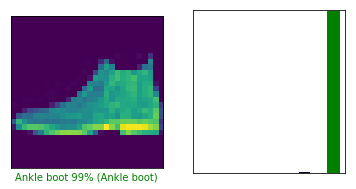

In [197]:
#Look at the 0th image, predictions, and prediction array.

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

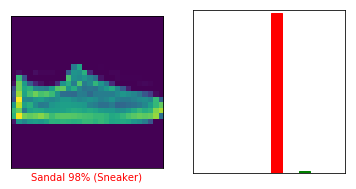

In [198]:
#Look at the 12th image, predictions, and prediction array.

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

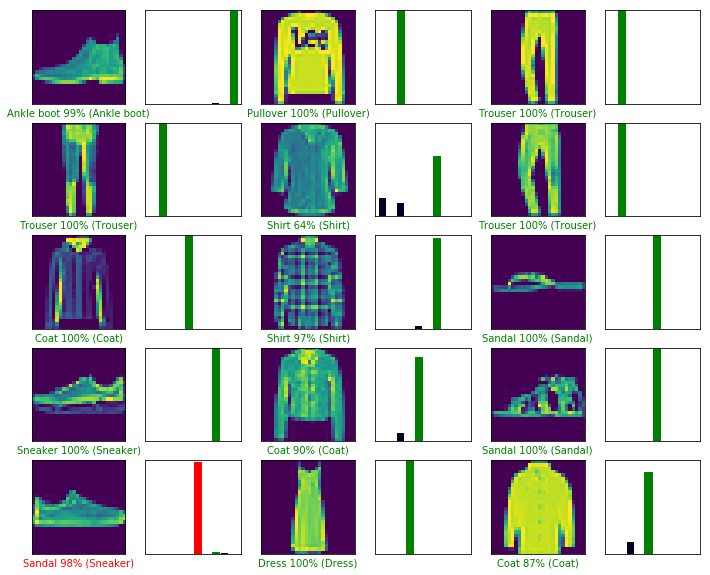

In [199]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [201]:
# Use the trained model to make a prediction about a single image
# Grab an image from the test dataset
img = test_images[0]

img.shape

(28, 28)

In [202]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

img.shape

(1, 28, 28)

In [204]:
#Now predict the image:

predictions_single = model.predict(img)

print(predictions_single)

[[1.2503528e-09 1.4017939e-08 1.1100645e-10 3.3128379e-11 3.3600214e-09
  1.2822413e-03 4.5166575e-11 4.7649434e-03 4.6555702e-08 9.9395269e-01]]


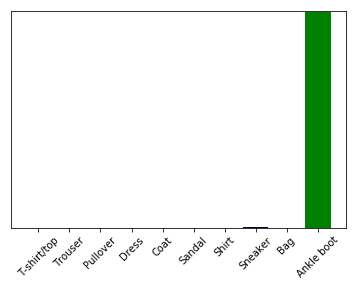

In [205]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [206]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.
